# Regresión logística: Implementación en Python

Se han aprovechado los códigos escritos para los análisis exploratorios + dummyficación de las features/variables categóricas presentes en un dataset que almacena información bancaria que recoge atributos del cliente y si este ha comprado o no un producto financiero.

La primera parte del código se corresponde con el análisis exploratorio,la segunda con la dummieficación y la tercera con la implementación del modelo bajo los módulos statsmodels y scikit-learn.

#### PARTE 1. ANÁLISIS EXPLORATORIO DEL DATASET

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
datapath = r'../git/python-ml-course/datasets/bank/bank.csv'

In [45]:
# comprobación de carga
data = pd.read_csv(datapath, sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [46]:
# estructura
data.shape

(4119, 21)

In [47]:
# nombres de las features
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [48]:
# comprobación de respuestas posibles presentes en la columna 'y'
data['y'].unique()
print(f'Los casos posibles para el atributo "y" son: ', data['y'].unique())

Los casos posibles para el atributo "y" son:  ['no' 'yes']


In [49]:
data['y_bool'] = np.where(data['y'] == 'no', 0, 1)
data.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bool
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0


In [50]:
# únicos en el atributo educación
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [51]:
# agrupación de los tres tramos de educación básica en un único caso llamado básica
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bool
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [52]:
# cambios de nombre de los otros casos posibles para el atributo 'educación'
data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])
data['education'] = np.where(data['education'] == 'proffessional.course', 'Proffessional Course', data['education'])
data['education'] = np.where(data['education'] == 'illiterate', 'Illiterate', data['education'])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bool
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [53]:
# Análisis exploratorio del número de veces para cada valor posible de la columna 'y'
data['y_bool'].value_counts()

0    3668
1     451
Name: y_bool, dtype: int64

In [54]:
# Análisis exploratorio: groupby de 'y' para ver las medias 
data.groupby('y_bool').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y_bool,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [55]:
# Análisis exploratorio: groupby por la media por educación
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_bool
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


<AxesSubplot:xlabel='education'>

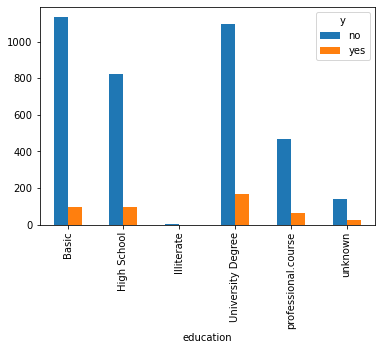

In [56]:
# Visualización del nivel de educación cruzado con si se ha comprado el producto o no
%matplotlib inline

pd.crosstab(data['education'], data['y']).plot(kind='bar')

#### Bar char stackeado de estado marital vs compras del producto

In [57]:
# observación de los features a cruzar
data[['marital', 'y_bool']]

,marital,y_bool
0,married,0
1,single,0
2,married,0
3,married,0
4,married,0
...,...,...
4114,married,0
4115,married,0
4116,single,0
4117,married,0


In [58]:
# análisis exploratorio del número de casos posibles en cada feature
data[['marital', 'y_bool']].value_counts()

marital   y_bool
married   0         2257
single    0          998
divorced  0          403
married   1          252
single    1          155
divorced  1           43
unknown   0           10
          1            1
dtype: int64

In [59]:
# crosstab/tabla de frecuencias de las features de interés
table_marital_y = pd.crosstab(data['marital'], data['y_bool'])
table_marital_y

y_bool,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


In [60]:
# crosstable en proporción: valor de la celda/suma total de la fila
# # suma por filas mostra mostrado en columna
table_marital_y.div(table_marital_y.sum(1).astype(float), axis=0)

y_bool,0,1
marital,,
divorced,0.903587,0.096413
married,0.899562,0.100438
single,0.865568,0.134432
unknown,0.909091,0.090909


Text(0, 0.5, 'Proporción de compra/no compra')

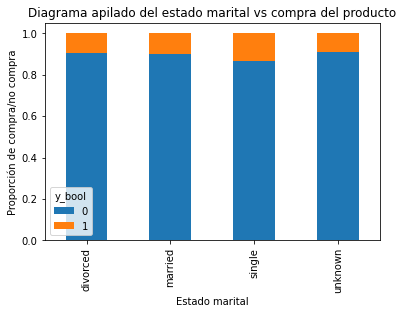

In [61]:
# visualización del bar chart
table_marital_y.div(table_marital_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Diagrama apilado del estado marital vs compra del producto')
plt.xlabel('Estado marital')
plt.ylabel('Proporción de compra/no compra')

#### Bar char stackeado de estado marital vs compras del producto

In [62]:
# comprobación de las features de interés
data[['month', 'y_bool']]

,month,y_bool
0,may,0
1,may,0
2,jun,0
3,jun,0
4,nov,0
...,...,...
4114,jul,0
4115,jul,0
4116,may,0
4117,aug,0


In [63]:
# análisis exploratorio del número de casos posibles por feature
data[['month', 'y_bool']].value_counts()

month  y_bool
may    0         1288
jul    0          652
aug    0          572
jun    0          462
nov    0          403
apr    0          179
may    1           90
jun    1           68
aug    1           64
jul    1           59
oct    0           44
nov    1           43
sep    0           38
apr    1           36
mar    1           28
sep    1           26
oct    1           25
mar    0           20
dec    1           12
       0           10
dtype: int64

In [64]:
# crosstab/tabla de frecuencias de las features de interés
crosstab_month_y = pd.crosstab(data['month'], data['y_bool'])
crosstab_month_y

y_bool,0,1
month,,
apr,179,36
aug,572,64
dec,10,12
jul,652,59
jun,462,68
mar,20,28
may,1288,90
nov,403,43
oct,44,25


In [65]:
# crosstab en formato proporción
crosstab_month_y.div(crosstab_month_y.sum(1), axis = 0)

y_bool,0,1
month,,
apr,0.832558,0.167442
aug,0.899371,0.100629
dec,0.454545,0.545455
jul,0.917018,0.082982
jun,0.871698,0.128302
mar,0.416667,0.583333
may,0.934688,0.065312
nov,0.903587,0.096413
oct,0.637681,0.362319


Text(0, 0.5, 'Proporción compra/no compra')

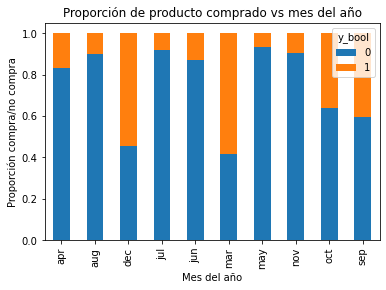

In [66]:
# chart bar stacked de la crossbar proporcional
crosstab_month_y.div(crosstab_month_y.sum(1), axis = 0).plot(kind='bar', stacked='True')
plt.title('Proporción de producto comprado vs mes del año')
plt.xlabel('Mes del año')
plt.ylabel('Proporción compra/no compra')

<AxesSubplot:xlabel='month'>

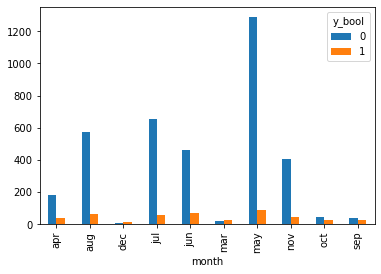

In [67]:
# bar chart sin stackear
crosstab_month_y.plot(kind='bar')

#### Análisis edad vs compra del producto

In [68]:
# observación de las features de interés
data[['age', 'y_bool']]

,age,y_bool
0,30,0
1,39,0
2,25,0
3,38,0
4,47,0
...,...,...
4114,30,0
4115,39,0
4116,27,0
4117,58,0


In [69]:
# análisis exploratorio: número de casos posibles por feature
data[['age', 'y_bool']].value_counts()

age  y_bool
32   0         194
31   0         164
34   0         164
35   0         164
30   0         155
              ... 
67   1           1
74   1           1
73   1           1
69   0           1
88   0           1
Length: 124, dtype: int64

(array([  4.,   4.,  17.,  16.,  57., 119.,  87., 247., 177., 191., 386.,
        174., 340., 137., 150., 236., 147., 220.,  97., 104., 206.,  86.,
        170.,  77.,  77., 166.,  68., 136.,  64.,  49.,  38.,   5.,   9.,
          3.,   6.,   8.,   2.,   7.,   2.,   3.,   5.,   4.,   5.,   0.,
          4.,   5.,   0.,   1.,   2.,   1.]),
 array([18. , 19.4, 20.8, 22.2, 23.6, 25. , 26.4, 27.8, 29.2, 30.6, 32. ,
        33.4, 34.8, 36.2, 37.6, 39. , 40.4, 41.8, 43.2, 44.6, 46. , 47.4,
        48.8, 50.2, 51.6, 53. , 54.4, 55.8, 57.2, 58.6, 60. , 61.4, 62.8,
        64.2, 65.6, 67. , 68.4, 69.8, 71.2, 72.6, 74. , 75.4, 76.8, 78.2,
        79.6, 81. , 82.4, 83.8, 85.2, 86.6, 88. ]),
 <BarContainer object of 50 artists>)

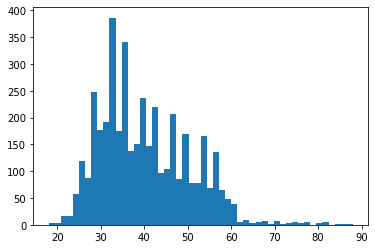

In [70]:
# histograma de la distribución de compra por edad
# la mayor disposición a la compra del producto se da entre los 25 y 60 años
plt.hist(x = data['age'], bins=50)

#### PARTE 2. DUMMIEFICACIÓN DE LAS VARIABLES CATEGÓRICAS

In [71]:
# librerías de scikit-learn para el modelo
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [72]:
# Se seleccionan las variables categóricas presentes en el dataset
categories = ['job', 'month', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']

# copia de trabajo para la dummyficación
raw_dummydf = data.copy()

# dummyficación + joining para componer el dataset completo bruto
for category in categories:
    dummy = pd.get_dummies(data[category], prefix=category)
    raw_dummydf = raw_dummydf.join(dummy)

raw_dummydf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,1,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,1,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,1,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,1,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,1,0,0,1,0,0,0,0,1,0


In [73]:
# estructura del bruto
raw_dummydf.shape

(4119, 73)

In [74]:
# Se eliminan las features originales no dummyficadas
raw_dummydf = raw_dummydf.drop(categories, axis = 1)
raw_dummydf.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'y_bool', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_University Degree',
       'education_professional.course', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'day_of_

In [75]:
# Se elimina la variable de salida para obtener
# Dataset dummyficado neto
data_dummyfied = raw_dummydf.drop(['y', 'y_bool'], axis = 1)
data_dummyfied.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_University Degree',
       'education_professional.course', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
    

In [76]:
# Selección de la matriz bruta de features y del vector de salida
Y = data['y_bool'].values.ravel()
X = data_dummyfied

#### Selección de predictoras para el modelo

In [77]:
# Número de variables a evaluar
n = 12

In [78]:
# instanciación del objeto para el modelo
lr_model = LogisticRegression()

In [79]:
# Ajuste del modelo por eliminación iterativa de predictoras: Recursive Feature Elimination RFE
'''
The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable.
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
'''
rfe = RFE(lr_model, n)
rfe.fit(X , Y)

C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):

C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\DSenPython\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

RFE(estimator=LogisticRegression(), n_features_to_select=12)

In [80]:
# muestra de las predictoras escogidas
print(rfe.support_)

[False False False False False False False False  True False False  True
  True False  True False  True False False False False False False False
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
  True]


In [81]:
# orden de importancia de todas las predictoras: 1: 12 escogidas; 2, 3, 4...: orden de importancia de las no escogidas
print(rfe.ranking_)

[26 38 14 44 47 10 23 16  1 31  7  1  1 40  1  4  1 39 41  6  5 46 32 15
  1  1  1  1  1 20 42 45 13 30 24 49 21 11 48 28 17  3 27 25 50  8 18 43
 12 33 29  9  1 37 36 22 35 34  2 19  1]


In [82]:
# listado del ZIP de X, rfe.support_ y rfe.ranking_ para comprobar las predictoras que han quedado en el modelo
lrm_predictor_vars = zip(X, rfe.support_, rfe.ranking_)
list_lrm_vars = list(lrm_predictor_vars)
list_lrm_vars

[('age', False, 26),
 ('duration', False, 38),
 ('campaign', False, 14),
 ('pdays', False, 44),
 ('previous', False, 47),
 ('emp.var.rate', False, 10),
 ('cons.price.idx', False, 23),
 ('cons.conf.idx', False, 16),
 ('euribor3m', True, 1),
 ('nr.employed', False, 31),
 ('job_admin.', False, 7),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 40),
 ('job_management', True, 1),
 ('job_retired', False, 4),
 ('job_self-employed', True, 1),
 ('job_services', False, 39),
 ('job_student', False, 41),
 ('job_technician', False, 6),
 ('job_unemployed', False, 5),
 ('job_unknown', False, 46),
 ('month_apr', False, 32),
 ('month_aug', False, 15),
 ('month_dec', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', False, 20),
 ('month_oct', False, 42),
 ('month_sep', False, 45),
 ('marital_divorced', False, 13),
 ('marital_married', False, 30),
 ('marital_single', False, 24),
 ('marital

In [83]:
list_lrm_predictor_vars = []

for predictor in list_lrm_vars:
    
    if predictor[1] == True:
        print(predictor[0], '->', predictor[1])
        list_lrm_predictor_vars.append(predictor[0])

print('Variables predictoras:', list_lrm_predictor_vars)

euribor3m -> True
job_blue-collar -> True
job_entrepreneur -> True
job_management -> True
job_self-employed -> True
month_dec -> True
month_jul -> True
month_jun -> True
month_mar -> True
month_may -> True
contact_telephone -> True
poutcome_success -> True
Variables predictoras: ['euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_self-employed', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'contact_telephone', 'poutcome_success']


In [84]:
# Preparación para la predicción
X = data_dummyfied[list_lrm_predictor_vars]
Y = data['y_bool']

#### PARTE 3. IMPLEMENTACIÓN EN PYTHON

#### Con statsmodels

In [86]:
# statsmodel para el modelo
import statsmodels.api as sm

In [87]:
logit_model = sm.Logit(Y, X)

In [88]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.280043
         Iterations 7


In [89]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.189      
Dependent Variable: y_bool           AIC:              2330.9911  
Date:               2021-11-19 11:14 BIC:              2406.8715  
No. Observations:   4119             Log-Likelihood:   -1153.5    
Df Model:           11               LL-Null:          -1422.9    
Df Residuals:       4107             LLR p-value:      1.6412e-108
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
euribor3m         -0.5901   0.0284 -20.7805 0.0000 -0.6458 -0.5345
job_blue-collar   -0.4657   0.1562  -2.9823 0.0029 -0.7718 -0.1597
job_entrepreneur  -0.6604   0.3821  -1.7284 0.0839 -1.4092  0.0885
job_management    -0.5305   0.2196  -2.4153 0.0157 -0.9610 -0.1000
job_self-employed -0.6533   0.3252  -2.0087 0.0446 -1.2907 -0.0159
month_dec          0.5797   0.4574   1.2672 0.2051 -0.3169  1.4762
month_jul          0.2848   0.1842   1.5462 0.1221 -0.0762  0.6457
month_jun          0.4406   0.1806   2.4397 0.0147  0.0866  0.7945
month_mar          0.9912   0.3118   3.1793 0.0015  0.3801  1.6022
month_may         -1.0270   0.1279  -8.0293 0.0000 -1.2777 -0.7763
contact_telephone -0.2239   0.1609  -1.3916 0.1640 -0.5393  0.0915
poutcome_success   1.4177   0.1921   7.3814 0.0000  1.0413  1.7942
==================================================================

"""

#### Con scikit-learn

In [90]:
from sklearn import linear_model

In [92]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression()

In [94]:
# Estadístico R^2
logit_model.score(X,Y)

0.9011896091284293

In [114]:
# Coeficientes del modelo
logit_model.coef_

array([[-0.46671787, -0.3571438 , -0.44861225, -0.33954581, -0.45258843,
         0.82534147,  0.32829003,  0.6275178 ,  1.25912595, -0.69609085,
        -0.27722199,  1.70761742]])

In [116]:
# Coeficientes del modelo pasados a array 1D
np.transpose(logit_model.coef_)

array([[-0.46671787],
       [-0.3571438 ],
       [-0.44861225],
       [-0.33954581],
       [-0.45258843],
       [ 0.82534147],
       [ 0.32829003],
       [ 0.6275178 ],
       [ 1.25912595],
       [-0.69609085],
       [-0.27722199],
       [ 1.70761742]])

In [118]:
# Nombre de las predictoras en un array 1D (pandas.Index)
X.columns

Index(['euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_management',
       'job_self-employed', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'contact_telephone', 'poutcome_success'],
      dtype='object')

In [125]:
# zip de las predictoras junto con sus coeficientes
zip_colnames_coef = list(zip(X.columns.values, np.transpose(logit_model.coef_)))
zip_colnames_coef

[('euribor3m', array([-0.46671787])),
 ('job_blue-collar', array([-0.3571438])),
 ('job_entrepreneur', array([-0.44861225])),
 ('job_management', array([-0.33954581])),
 ('job_self-employed', array([-0.45258843])),
 ('month_dec', array([0.82534147])),
 ('month_jul', array([0.32829003])),
 ('month_jun', array([0.6275178])),
 ('month_mar', array([1.25912595])),
 ('month_may', array([-0.69609085])),
 ('contact_telephone', array([-0.27722199])),
 ('poutcome_success', array([1.70761742]))]

In [126]:
# Creación de un dataframe con la info del zip para darle mejor formato
pd.DataFrame(zip_colnames_coef)

,0,1
0,euribor3m,[-0.4667178741372947]
1,job_blue-collar,[-0.3571437963841792]
2,job_entrepreneur,[-0.44861224836616237]
3,job_management,[-0.3395458099388114]
4,job_self-employed,[-0.45258842856595577]
5,month_dec,[0.8253414685140621]
6,month_jul,[0.32829003454758005]
7,month_jun,[0.6275177984700893]
8,month_mar,[1.259125954074701]
9,month_may,[-0.696090851629428]
